In [1]:
%matplotlib inline

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris, make_circles

from sklearn.svm import LinearSVC, SVC, OneClassSVM

from sklearn.preprocessing import PolynomialFeatures

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import SGDClassifier

In [25]:
iris_dataset = load_iris()

In [26]:
attributes, target = iris_dataset["data"], iris_dataset["target"]

In [6]:
attributes, target

(array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
        [5

In [34]:
poly_attributes = PolynomialFeatures(degree= 3).fit_transform(attributes)

In [28]:
simple_model_class = LinearSVC(C=1e-3)

In [29]:
simple_model_class.fit(attributes, target)

LinearSVC(C=0.001)

In [30]:
simple_model_class.coef_

array([[ 0.01439041,  0.10003512, -0.18606443, -0.08267261],
       [-0.03772147, -0.07470293,  0.03918064,  0.00299681],
       [-0.07744774, -0.09388879,  0.11991644,  0.07658286]])

In [31]:
simple_model_class.predict(attributes)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
simple_model_class.score(attributes, target)

0.6666666666666666

In [35]:
poly_svm = LinearSVC(C=1e-3)
poly_svm.fit(poly_attributes, target)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=0.001)

In [36]:
poly_svm.score(poly_attributes, target)

0.98

In [38]:
poly_attributes.shape

(150, 35)

In [47]:
circle_attributes, circle_target = make_circles(noise=0.08, factor=0.5)

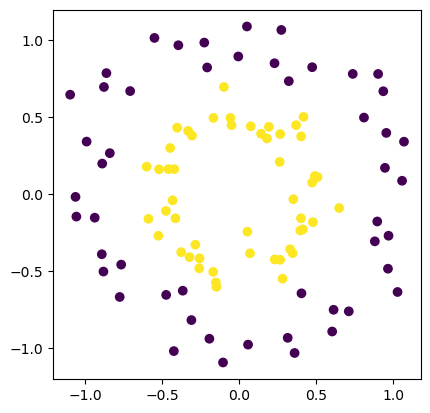

In [48]:
plt.scatter(circle_attributes[:,0], circle_attributes[:,1], c= circle_target)
plt.gca().set_aspect("equal")

In [49]:
circle_svm = LinearSVC()

In [50]:
circle_svm.fit(circle_attributes, circle_target)

LinearSVC()

In [51]:
circle_svm.score(circle_attributes, circle_target)

0.51

In [52]:
circle_poly_attributes = PolynomialFeatures(degree=2).fit_transform(circle_attributes)

In [53]:
circle_svm.fit(circle_poly_attributes, circle_target)

LinearSVC()

In [54]:
circle_svm.score(circle_poly_attributes, circle_target)

0.99

In [56]:
circkle_svm_kernel = SVC(kernel= "poly", degree=2)

In [57]:
circkle_svm_kernel.fit(circle_attributes, circle_target)

SVC(degree=2, kernel='poly')

In [58]:
circkle_svm_kernel.score(circle_attributes, circle_target)

0.98

In [62]:
circkle_svm_kernel_rbf = SVC(kernel= "rbf", gamma=5)

In [63]:
circkle_svm_kernel_rbf.fit(circle_attributes, circle_target)

SVC(gamma=5)

In [64]:
circkle_svm_kernel_rbf.score(circle_attributes, circle_target)

0.99

In [71]:
knn = KNeighborsClassifier(n_neighbors=25)

In [72]:
knn.fit(circle_attributes[:-50], circle_target[:-50])

KNeighborsClassifier(n_neighbors=25)

In [73]:
knn.score(circle_attributes[:-50], circle_target[:-50])

0.64

In [78]:
detector = OneClassSVM(nu=0.9)

In [79]:
detector.fit(circle_attributes)

OneClassSVM(nu=0.9)

In [80]:
detector.predict(circle_attributes)

array([-1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,
       -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1])

In [82]:
svm_s = LinearSVC() # LinearSVC няма partial fit
sgd = SGDClassifier()

In [83]:
for chunk in pd.read_csv("../Clustering/data/pulsar_stars.csv", chunksize=1000):
    X, y = chunk.drop(columns = ["target_class"]), chunk["target_class"]
    
    sgd.partial_fit(X, y, classes= y.unique())

In [84]:
sgd.coef_


array([[-312.83900884,  180.54694567,  166.66283323,  554.73481915,
        -109.29164831,  191.13279809,  184.96630192, -158.74215671]])